In [1]:
%%file 0502.al
-57.9562533 -34.9005364
-57.9569507 -34.9010379
-57.9557812 -34.9017771 
-57.9547942 -34.9009236
-57.9536891 -34.9018299
-57.9547513 -34.9026922
-57.9557598 -34.9035281 
-57.956897 -34.9027626
-57.9580021 -34.9019267

Writing 0502.al


In [2]:
import graphviz as gv
G1 = []
with open("0502.al") as f:
  for line in f:
    if line == "-\n":
      G1.append([])
    else:
      G1.append([float(x) for x in line.split()])


In [3]:
n=len(G1)

e=[]
c=[]
d=[]
f=[]
for a in range(n):
  c.append(G1[a])
  for b in G1[a]:
    e.append(b)
    
for a in range(len(e)):
  if (a%2)==0:
    d.append(e[a])
  else:
    f.append(e[a])
  
print(e)
print(c)
print(d)
print(f)

[-57.9562533, -34.9005364, -57.9569507, -34.9010379, -57.9557812, -34.9017771, -57.9547942, -34.9009236, -57.9536891, -34.9018299, -57.9547513, -34.9026922, -57.9557598, -34.9035281, -57.956897, -34.9027626, -57.9580021, -34.9019267]
[[-57.9562533, -34.9005364], [-57.9569507, -34.9010379], [-57.9557812, -34.9017771], [-57.9547942, -34.9009236], [-57.9536891, -34.9018299], [-57.9547513, -34.9026922], [-57.9557598, -34.9035281], [-57.956897, -34.9027626], [-57.9580021, -34.9019267]]
[-57.9562533, -57.9569507, -57.9557812, -57.9547942, -57.9536891, -57.9547513, -57.9557598, -57.956897, -57.9580021]
[-34.9005364, -34.9010379, -34.9017771, -34.9009236, -34.9018299, -34.9026922, -34.9035281, -34.9027626, -34.9019267]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
n=9
ciudades=[i for i in range(n)]
arcos=[(i,j)for i in ciudades for j in ciudades if i!=j]
cordenadas_x=np.array(d)
cordenadas_y=np.array(f)
distancia={(i,j): np.hypot(cordenadas_x[i]-cordenadas_x[j],cordenadas_y[i]-cordenadas_y[j]) for i,j in arcos }  

In [5]:
distancia

{(0, 1): 0.0008589930209253968,
 (0, 2): 0.001327484425518803,
 (0, 3): 0.0015096014871460682,
 (0, 4): 0.0028719790894114828,
 (0, 5): 0.002627446981385847,
 (0, 6): 0.0030321298026326385,
 (0, 7): 0.0023173942543315107,
 (0, 8): 0.0022341073228466174,
 (1, 0): 0.0008589930209253968,
 (1, 2): 0.0013835269748019598,
 (1, 3): 0.00215952697135087,
 (1, 4): 0.003356381766131303,
 (1, 5): 0.0027521026234506524,
 (1, 6): 0.002760314991085945,
 (1, 7): 0.0017255357950544262,
 (1, 8): 0.001376737956184977,
 (2, 0): 0.001327484425518803,
 (2, 1): 0.0013835269748019598,
 (2, 3): 0.001304849129204888,
 (2, 4): 0.0020927661718393737,
 (2, 5): 0.0013777162334814388,
 (2, 6): 0.0017511307661109083,
 (2, 7): 0.0014886973802668982,
 (2, 8): 0.0022259328314261128,
 (3, 0): 0.0015096014871460682,
 (3, 1): 0.00215952697135087,
 (3, 2): 0.001304849129204888,
 (3, 4): 0.0014292045689877882,
 (3, 5): 0.001769120224855982,
 (3, 6): 0.002777733538340494,
 (3, 7): 0.0027935083389882655,
 (3, 8): 0.00336107602

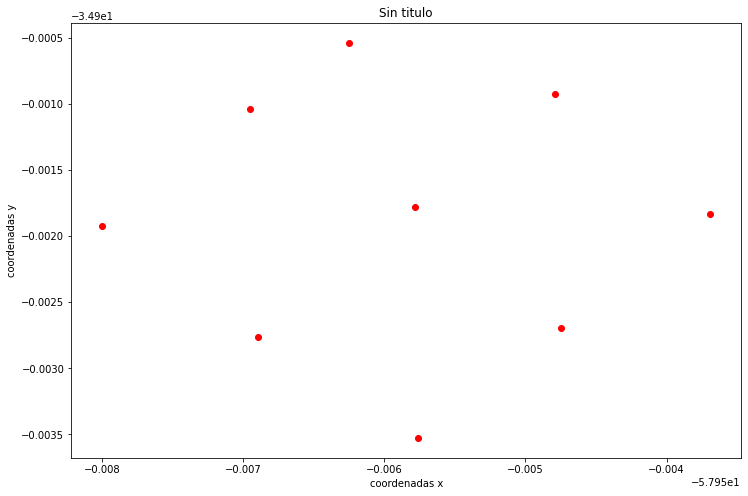

In [6]:
x=cordenadas_x
y=cordenadas_y
plt.figure(figsize=(12,8))
plt.scatter(x,y,color='red')
plt.xlabel('coordenadas x')
plt.ylabel('coordenadas y')
plt.title('Sin titulo')
plt.show()